In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
train_data=pd.read_csv('MobileTrain.csv')
test_data=pd.read_csv('MobileTest.csv')

In [3]:
train_data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
test_data.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


## EXPLORATORY DATA ANALYSIS 

In [5]:
train_data.shape

(2000, 21)

In [6]:
test_data.shape

(1000, 21)

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [8]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

In [9]:
train_data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [10]:
test_data.describe()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,500.500000,1248.510000,0.516000,1.540900,0.517000,4.593000,0.487000,33.652000,0.517500,139.51100,...,10.054000,627.121000,1239.774000,2138.998000,11.995000,5.316000,11.085000,0.756000,0.50000,0.507000
std,288.819436,432.458227,0.499994,0.829268,0.499961,4.463325,0.500081,18.128694,0.280861,34.85155,...,6.095099,432.929699,439.670981,1088.092278,4.320607,4.240062,5.497636,0.429708,0.50025,0.500201
min,1.000000,500.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.00000,...,0.000000,0.000000,501.000000,263.000000,5.000000,0.000000,2.000000,0.000000,0.00000,0.000000
25%,250.750000,895.000000,0.000000,0.700000,0.000000,1.000000,0.000000,18.000000,0.300000,109.75000,...,5.000000,263.750000,831.750000,1237.250000,8.000000,2.000000,6.750000,1.000000,0.00000,0.000000
50%,500.500000,1246.500000,1.000000,1.500000,1.000000,3.000000,0.000000,34.500000,0.500000,139.00000,...,10.000000,564.500000,1250.000000,2153.500000,12.000000,5.000000,11.000000,1.000000,0.50000,1.000000
75%,750.250000,1629.250000,1.000000,2.300000,1.000000,7.000000,1.000000,49.000000,0.800000,170.00000,...,16.000000,903.000000,1637.750000,3065.500000,16.000000,8.000000,16.000000,1.000000,1.00000,1.000000
max,1000.000000,1999.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.00000,...,20.000000,1907.000000,1998.000000,3989.000000,19.000000,18.000000,20.000000,1.000000,1.00000,1.000000


### UNIVARIATE ANALYSIS 

#### HISTOGRAM 

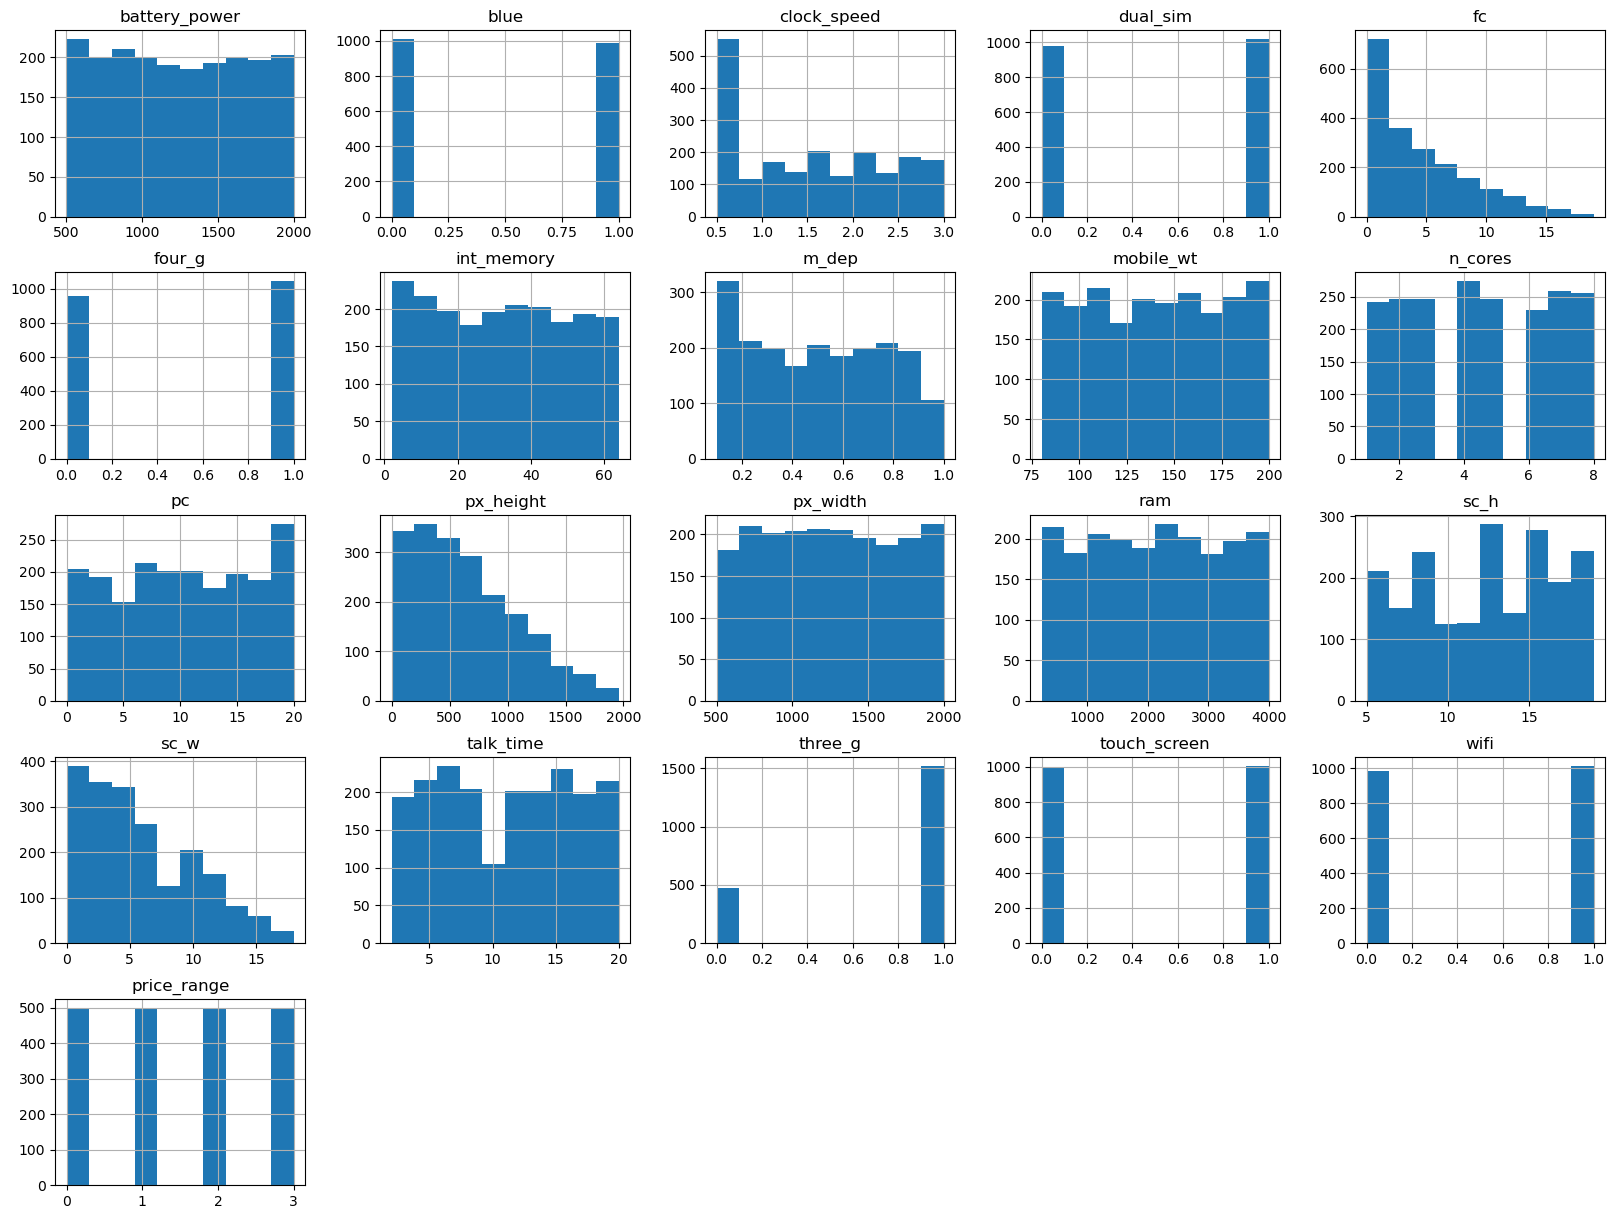

In [11]:
freqgraph=train_data.select_dtypes(include=['int','float'])
freqgraph.hist(figsize=(20,15))
plt.show()

### BIVARIATE ANALYSIS  

#### COUNT PLOT 

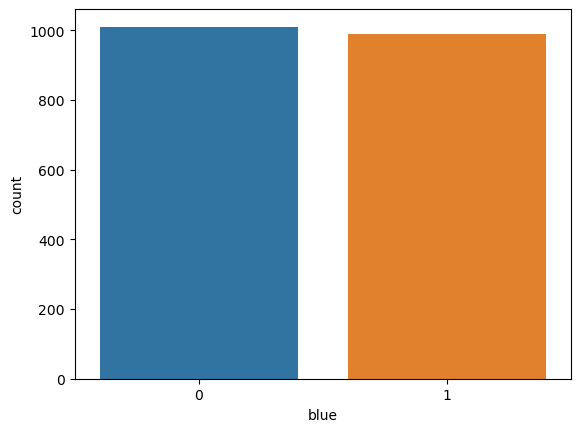

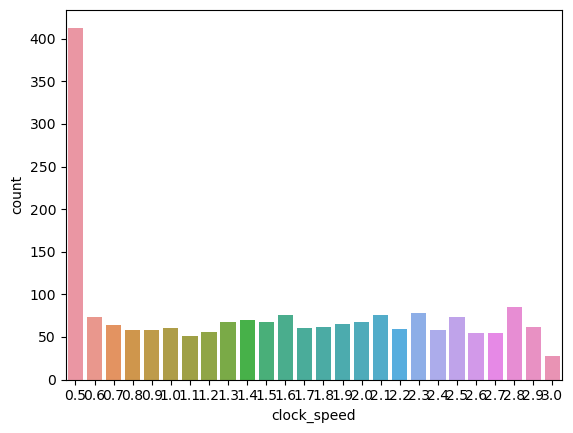

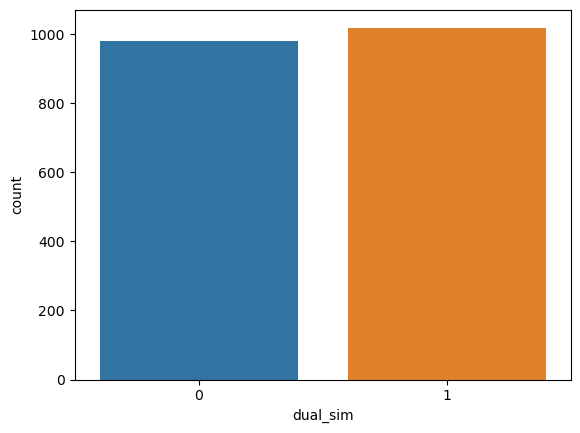

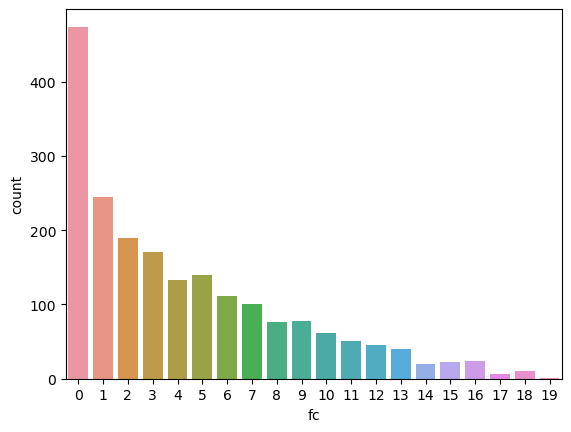

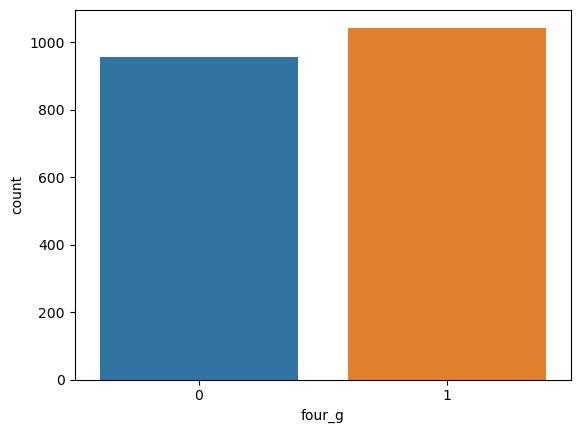

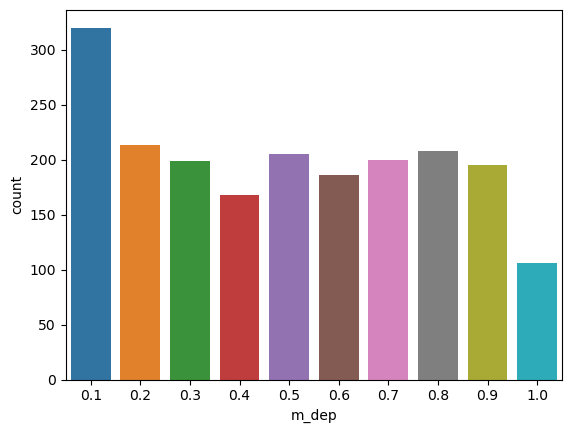

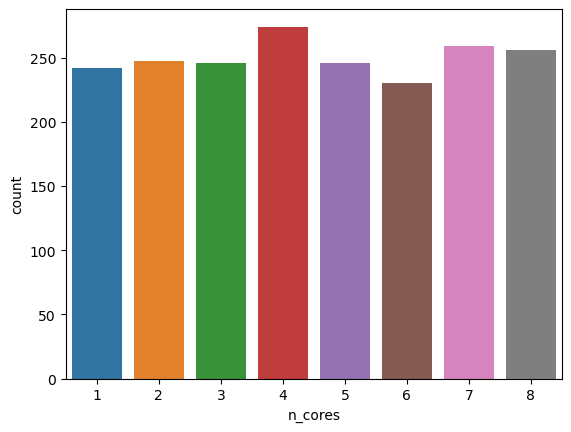

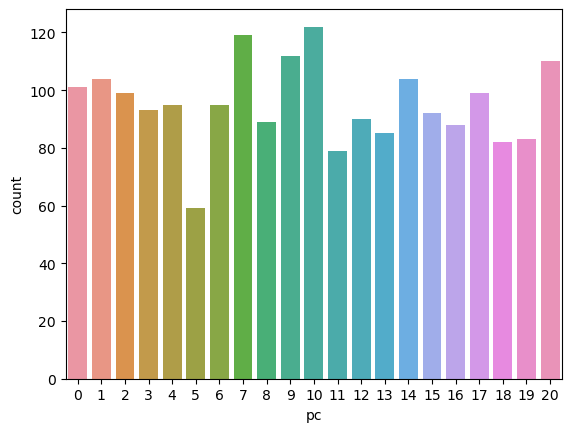

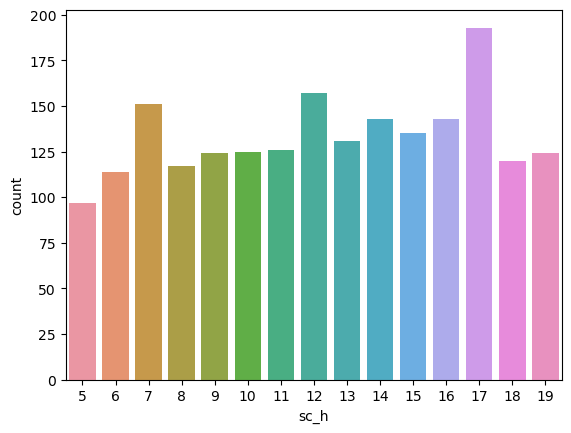

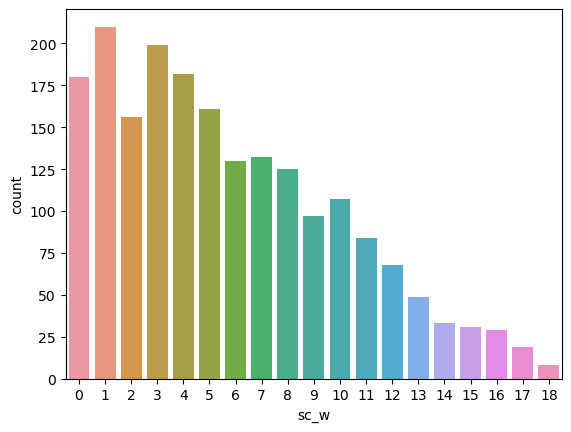

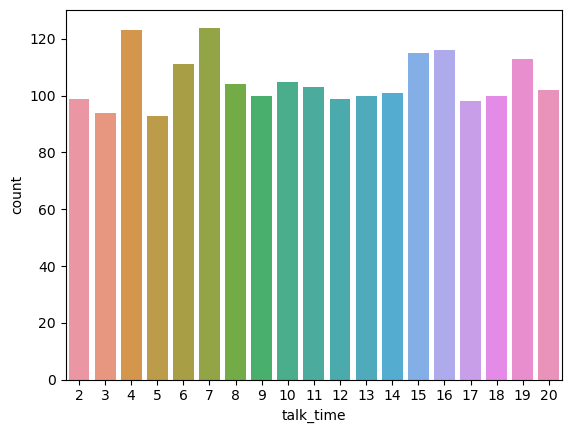

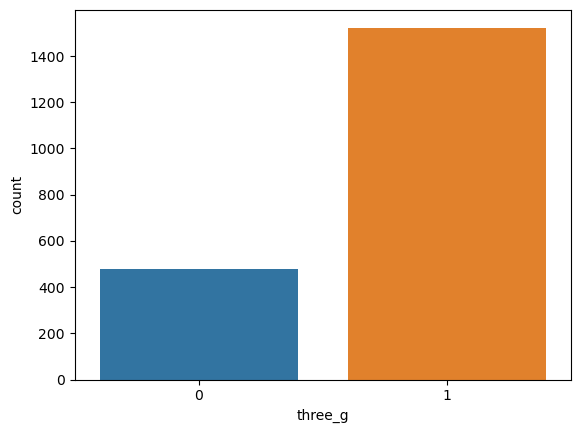

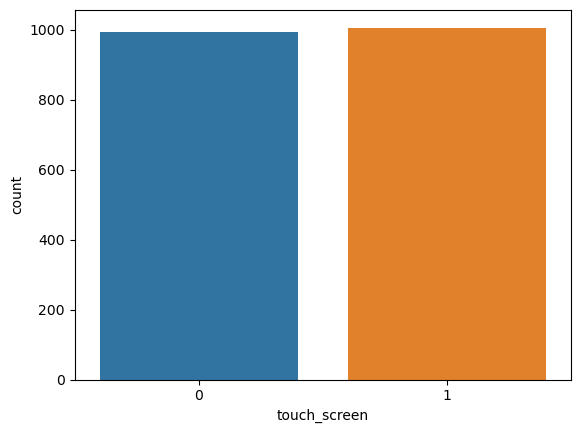

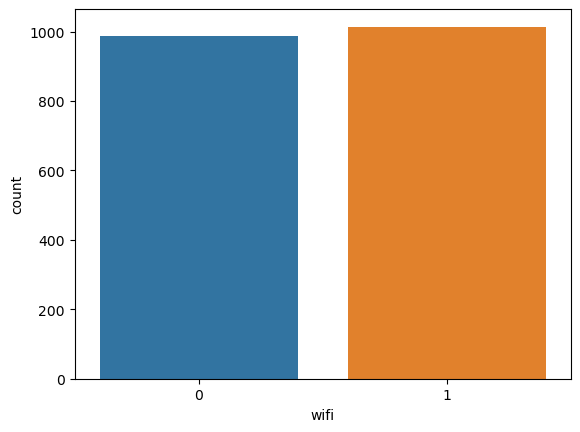

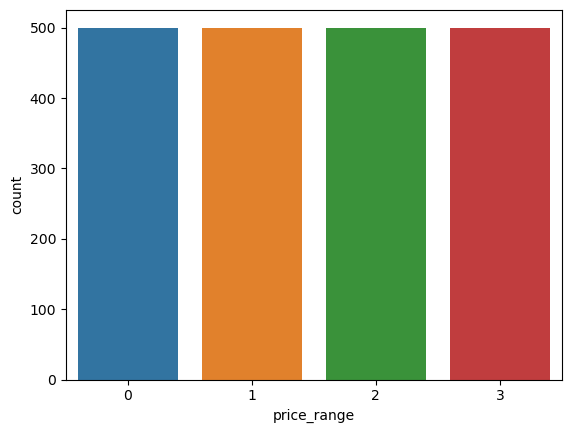

In [12]:
cols=['blue','clock_speed','dual_sim','fc','four_g','m_dep','n_cores','pc','sc_h','sc_w','talk_time','three_g','touch_screen','wifi','price_range']
for i in cols:
    warnings.simplefilter('ignore')
    sns.countplot(train_data[i])
    plt.show()    

### MULTIVARIATE ANALYSIS 

#### HEATMAP 

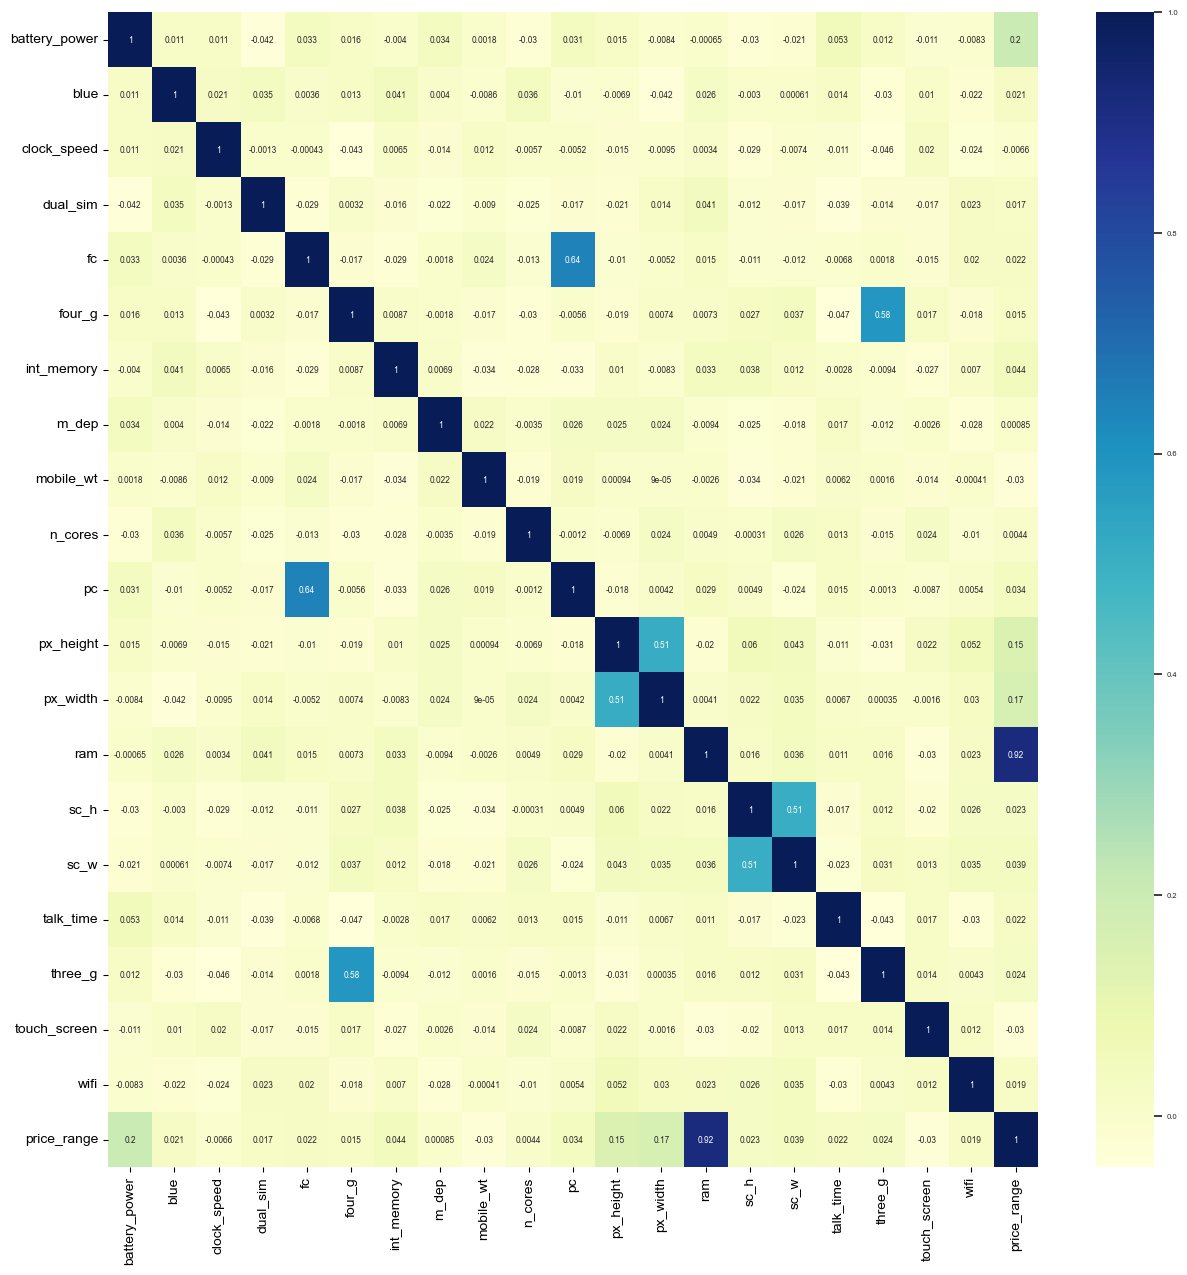

In [13]:
corrmatrix=train_data.corr()
plt.subplots(figsize=(15,15))
sns.set(font_scale=0.5)
sns.heatmap(corrmatrix,annot=True,cmap='YlGnBu')
plt.show()


In [14]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

### NULL VALUE DETECTION 

In [15]:
train_data.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [16]:
test_data.isna().sum()

id               0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

In [17]:
#There are no null values present in the training and testing dataset

In [18]:
test_data.describe()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,500.500000,1248.510000,0.516000,1.540900,0.517000,4.593000,0.487000,33.652000,0.517500,139.51100,...,10.054000,627.121000,1239.774000,2138.998000,11.995000,5.316000,11.085000,0.756000,0.50000,0.507000
std,288.819436,432.458227,0.499994,0.829268,0.499961,4.463325,0.500081,18.128694,0.280861,34.85155,...,6.095099,432.929699,439.670981,1088.092278,4.320607,4.240062,5.497636,0.429708,0.50025,0.500201
min,1.000000,500.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.00000,...,0.000000,0.000000,501.000000,263.000000,5.000000,0.000000,2.000000,0.000000,0.00000,0.000000
25%,250.750000,895.000000,0.000000,0.700000,0.000000,1.000000,0.000000,18.000000,0.300000,109.75000,...,5.000000,263.750000,831.750000,1237.250000,8.000000,2.000000,6.750000,1.000000,0.00000,0.000000
50%,500.500000,1246.500000,1.000000,1.500000,1.000000,3.000000,0.000000,34.500000,0.500000,139.00000,...,10.000000,564.500000,1250.000000,2153.500000,12.000000,5.000000,11.000000,1.000000,0.50000,1.000000
75%,750.250000,1629.250000,1.000000,2.300000,1.000000,7.000000,1.000000,49.000000,0.800000,170.00000,...,16.000000,903.000000,1637.750000,3065.500000,16.000000,8.000000,16.000000,1.000000,1.00000,1.000000
max,1000.000000,1999.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.00000,...,20.000000,1907.000000,1998.000000,3989.000000,19.000000,18.000000,20.000000,1.000000,1.00000,1.000000


### DUPLICATE RECORD CHECK 

In [19]:
train_data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1995    False
1996    False
1997    False
1998    False
1999    False
Length: 2000, dtype: bool

In [20]:
duplicate=test_data.drop('id',axis=1)

In [21]:
duplicate.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

### OUTLIER DETECTION 

In [22]:
#The outliers are being checked for continuous features in the dataset

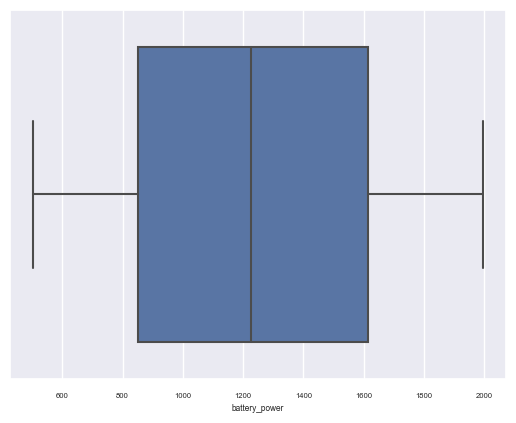

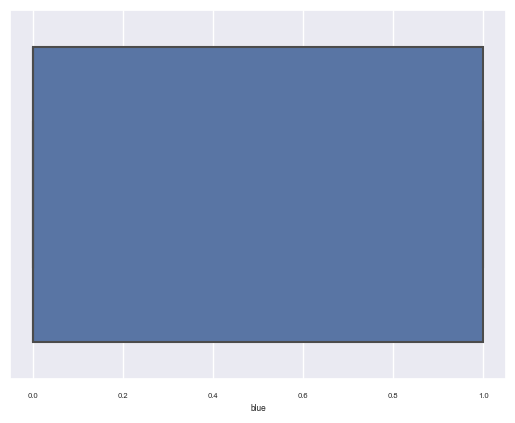

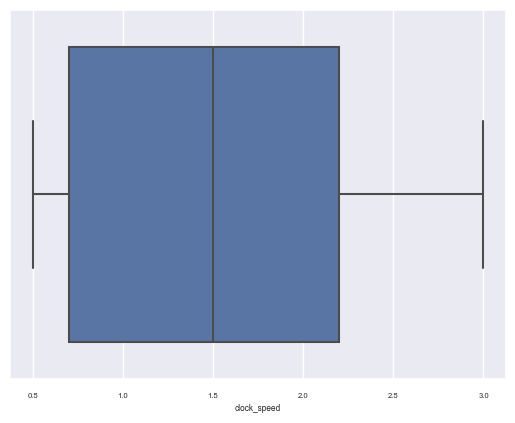

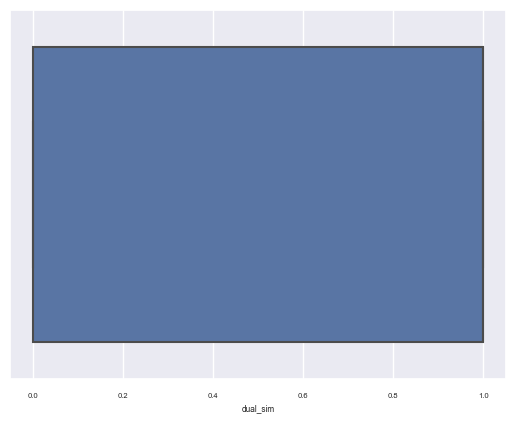

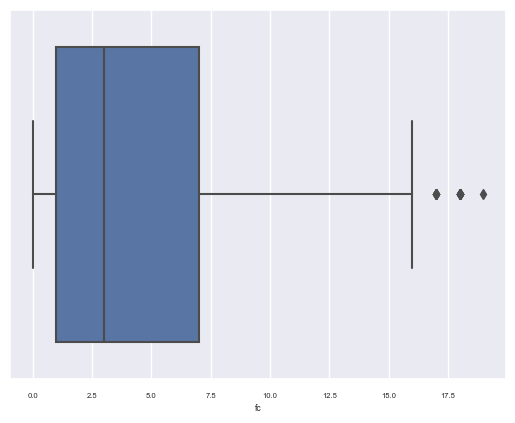

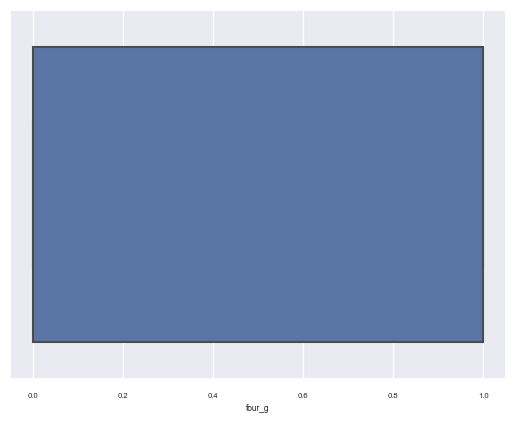

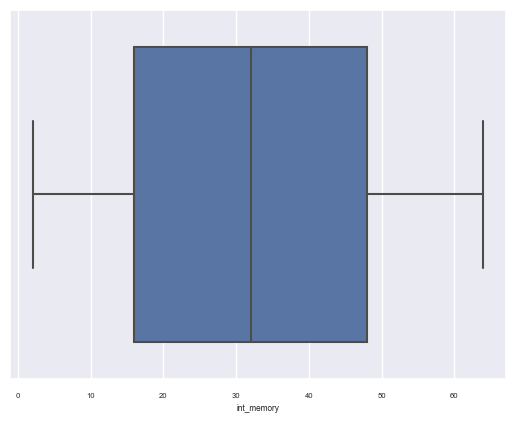

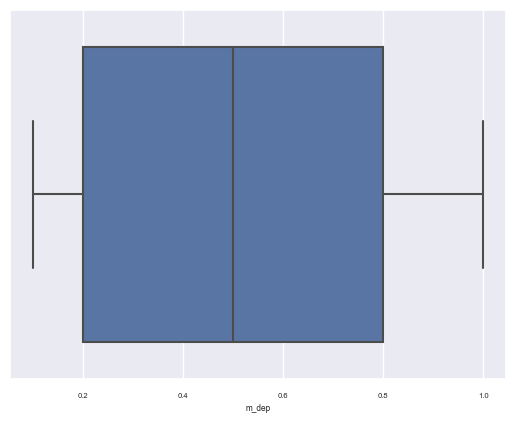

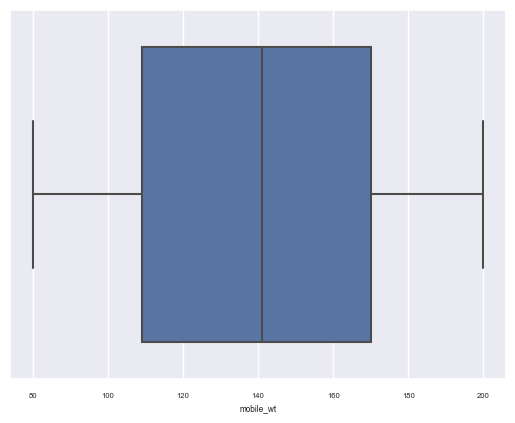

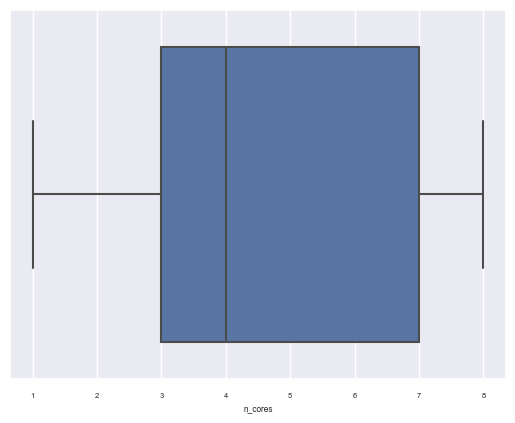

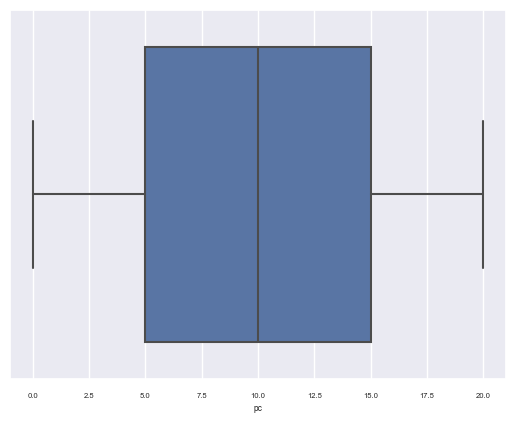

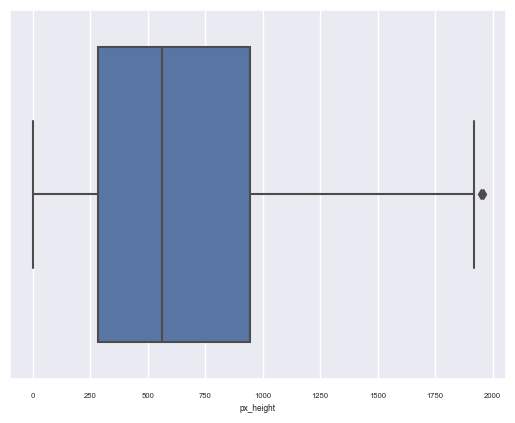

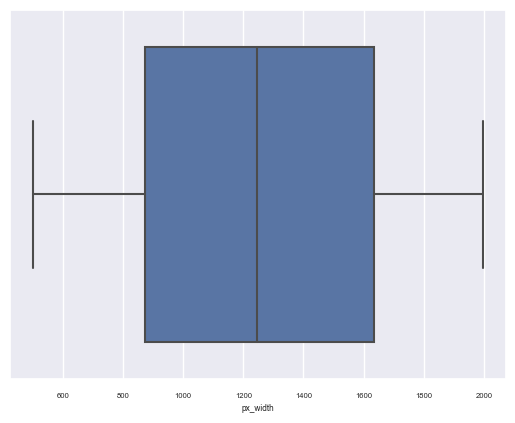

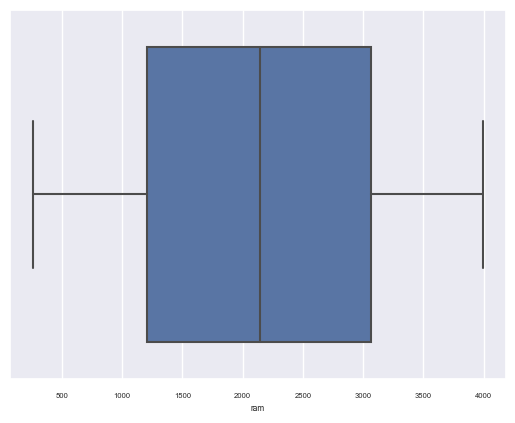

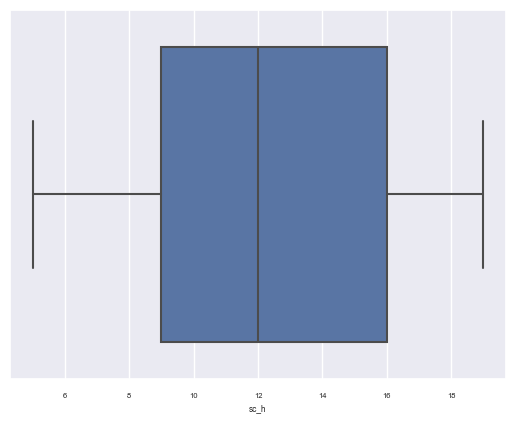

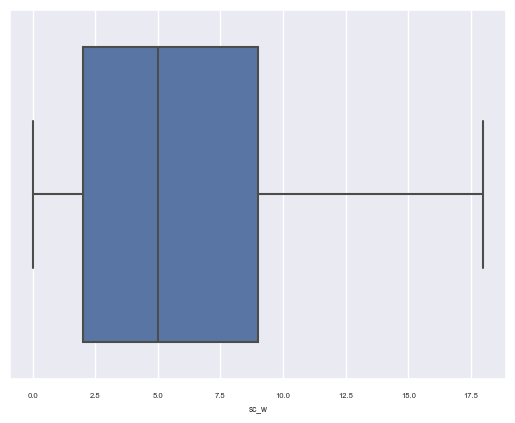

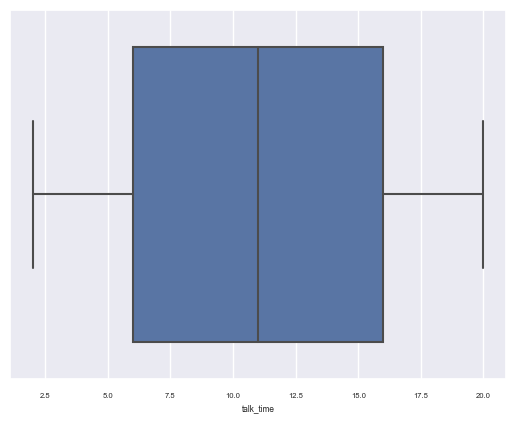

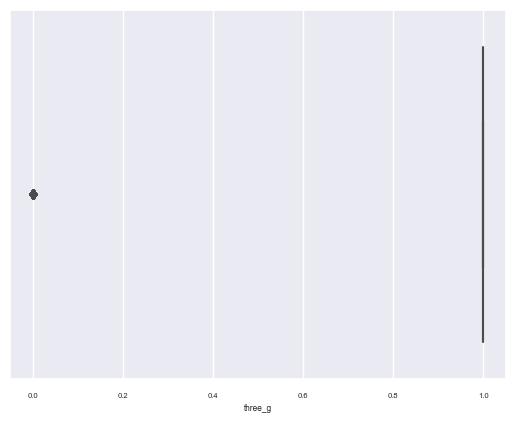

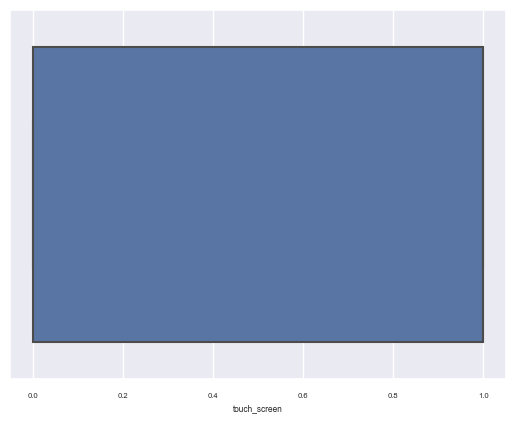

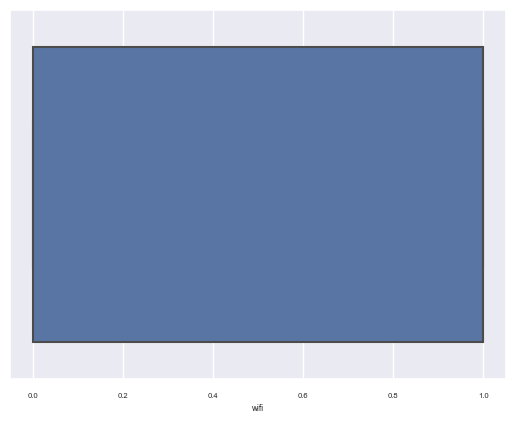

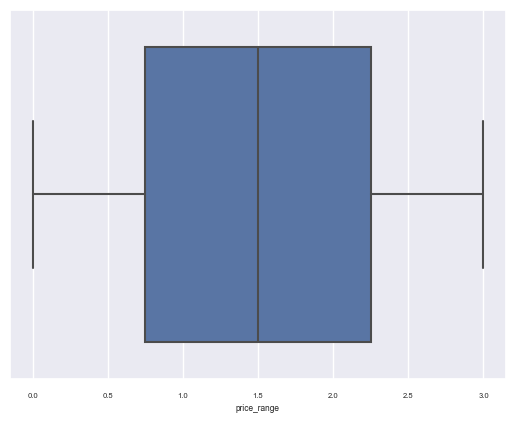

In [23]:
for i in train_data:
    sns.boxplot(x=train_data[i])
    plt.show()

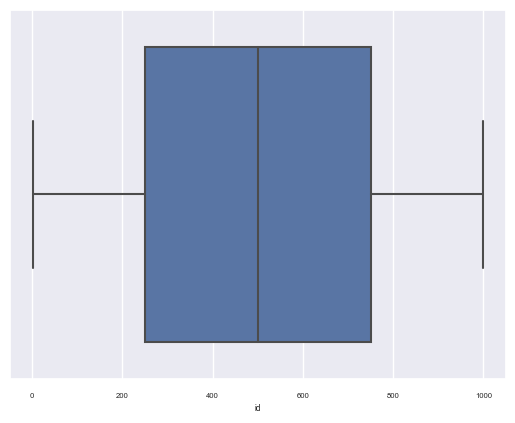

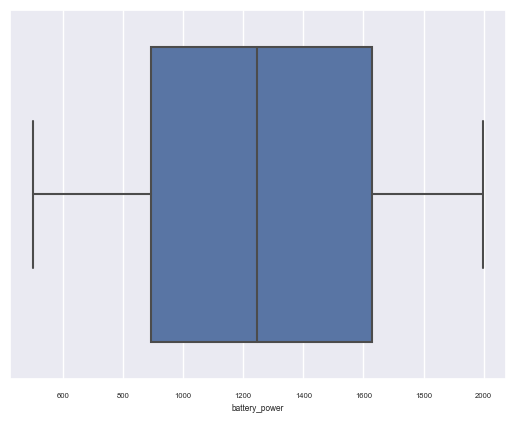

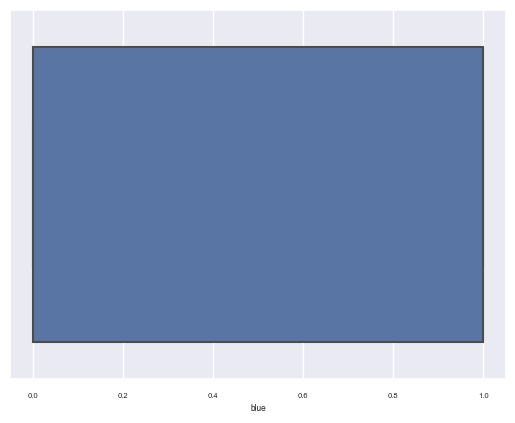

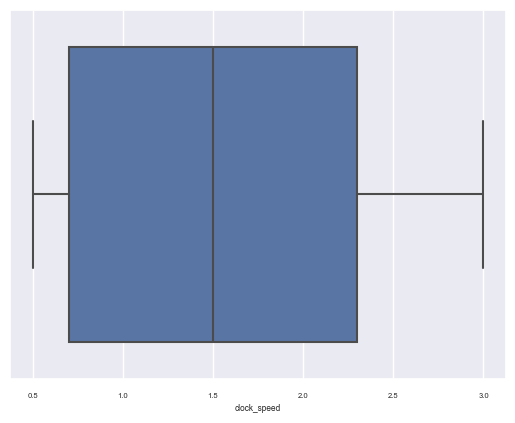

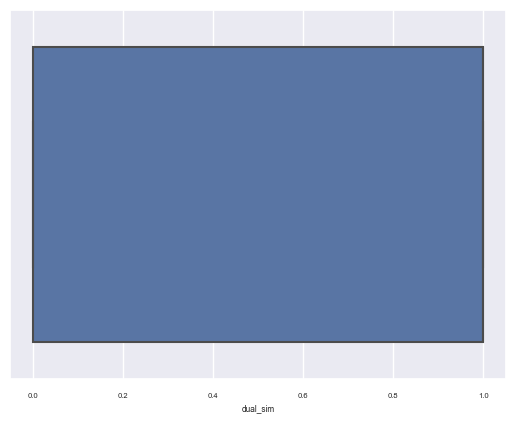

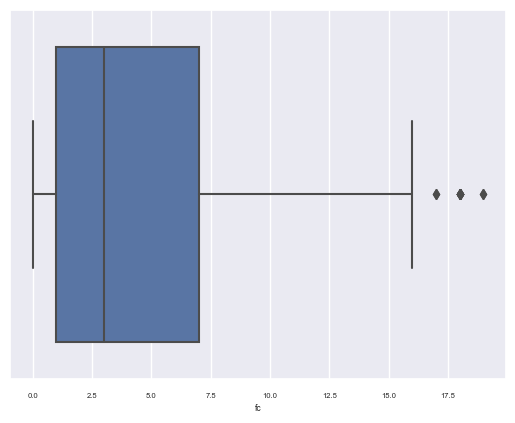

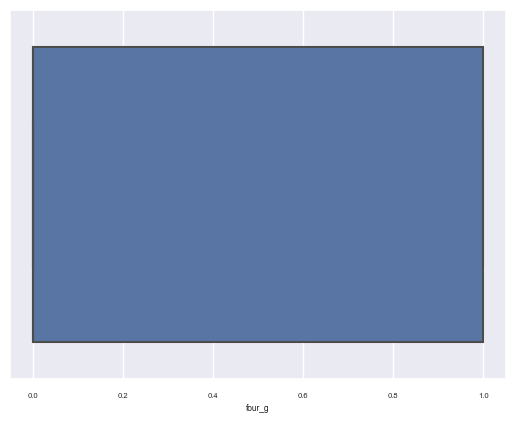

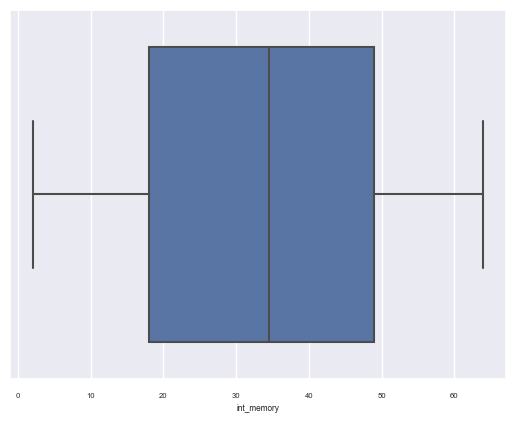

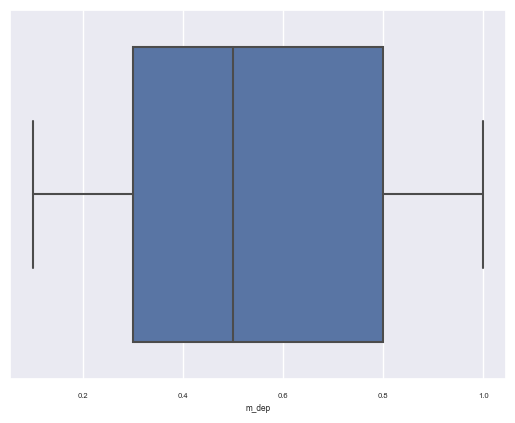

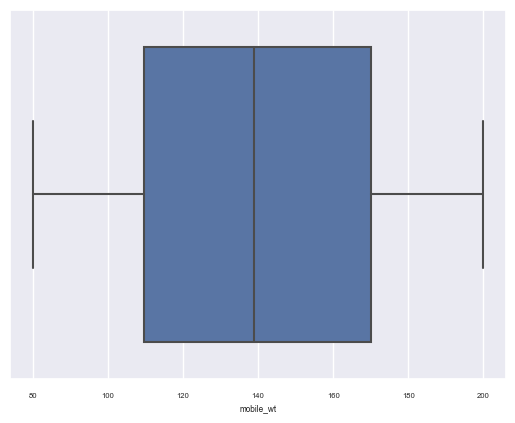

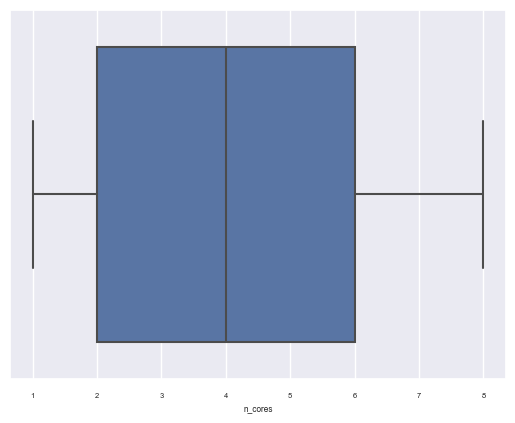

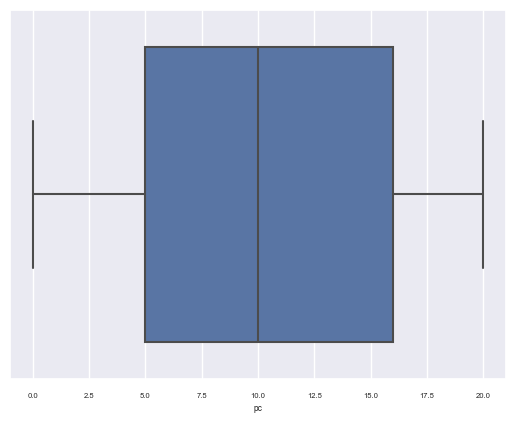

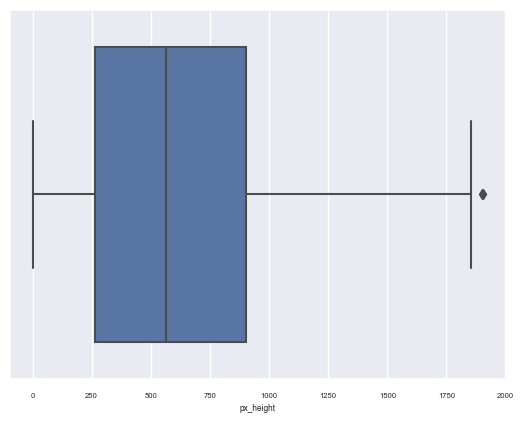

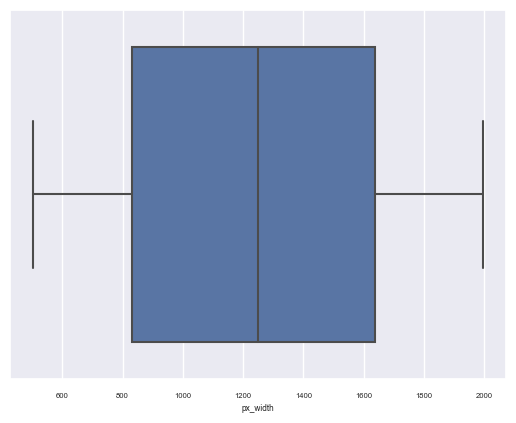

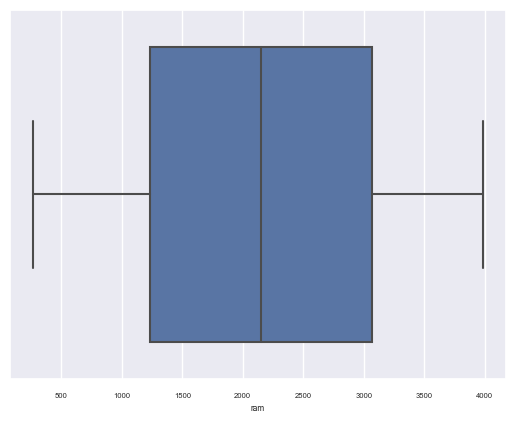

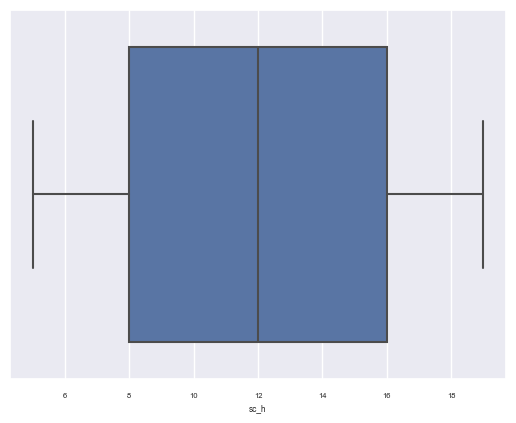

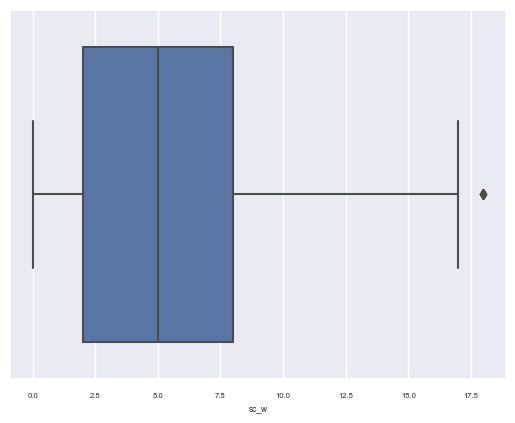

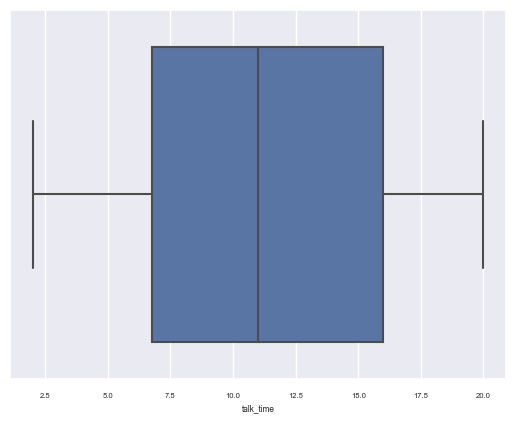

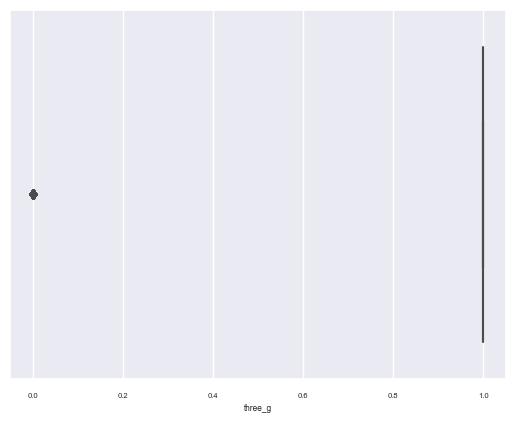

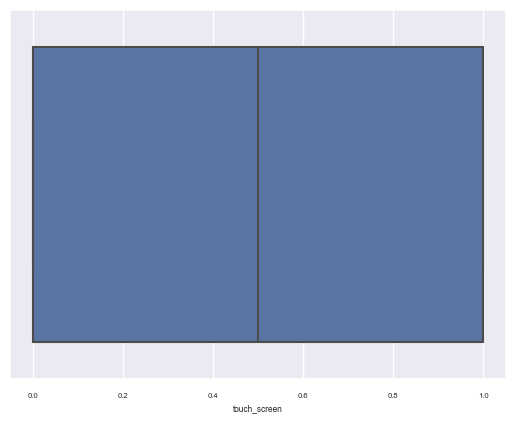

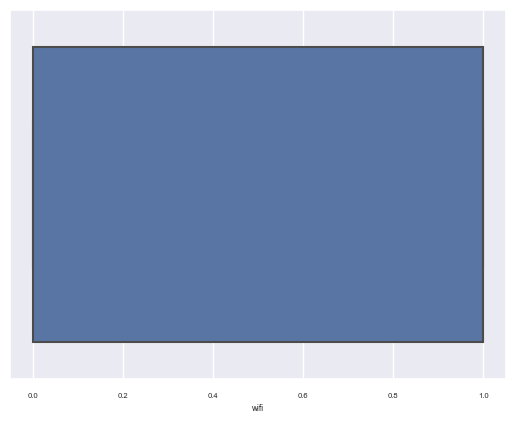

In [24]:
for i in test_data:
    sns.boxplot(x=test_data[i])
    plt.show()

In [25]:
train_data['fc'].unique()

array([ 1,  0,  2, 13,  3,  4,  5,  7, 11, 12, 16,  6, 15,  8,  9, 10, 18,
       17, 14, 19], dtype=int64)

In [26]:
train_data['px_height'].unique()

array([  20,  905, 1263, ...,  528,  915,  483], dtype=int64)

In [27]:
train_data['three_g'].unique()

array([0, 1], dtype=int64)

In [28]:
test_data['fc'].unique()

array([14,  4,  1, 18, 11,  5,  0,  9,  2,  8,  7, 16,  6, 15, 10,  3, 12,
       13, 17, 19], dtype=int64)

In [29]:
test_data['px_height'].unique()

array([ 226,  746, 1270,  295,  749,  569, 1283, 1312,  556,   52,  503,
        235,  829,  227, 1315,  185,  613,  335,   82,   47,  504,  521,
        777,  512, 1194, 1003,  575,   54,  627,  129,  876,  501, 1407,
        722, 1219,  119,  753,  162,  313,  181, 1416,  645,   79,  153,
        480,  700,  221, 1585,   65,  224,  705,  709,   97, 1131,  359,
       1813,  839,  550,  443,  502,  130,   19,  386,   22,   49, 1497,
       1327,  555, 1560,  346,  912,  756,  699,  582,  680,  814,  672,
        450,  757,  208, 1335,   91,   33, 1095,  336,  659,  183,  652,
        410,  440,  532, 1373,  773,  965,  568,  214,  423,  537,  667,
        491, 1037,  325, 1324,  597,  765,  470,  653,  463,  855,  492,
        605,  401,  366, 1225,  573,  261,  280,  565, 1379,  949,  703,
       1264, 1816,  108, 1328,  797,  361, 1049,  357,  197,  906,  806,
        924,  223,  140,  113, 1531,   35, 1524,  838,  495, 1212,  655,
        496,  800, 1010,  102,  948, 1286,  264,   

In [30]:
test_data['touch_screen'].unique()

array([1, 0], dtype=int64)

In [31]:
test_data['sc_w'].unique()

array([ 7,  0, 10,  8,  2,  9,  6,  5,  3, 12,  1, 11,  4, 13, 16, 14, 15,
       17, 18], dtype=int64)

In [32]:
#From the observations of the unique values and the boxplots of columns of both train and test datasets,
#outliers detected in the boxplot are not considered here as outliers. 

#### CLASSIFICATION OF DATASET TO HARDWARE AND SOFTWARE REQUESTS 

In [33]:
data_hard=train_data[['battery_power','clock_speed','dual_sim','fc','four_g','int_memory','m_dep','mobile_wt','n_cores','pc','px_height','px_width','ram','sc_h','sc_w','talk_time','three_g','touch_screen','wifi','price_range']]
data_soft=train_data[['blue']]

In [34]:
data_hard_test=test_data[['id','battery_power','clock_speed','dual_sim','fc','four_g','int_memory','m_dep','mobile_wt','n_cores','pc','px_height','px_width','ram','sc_h','sc_w','talk_time','three_g','touch_screen','wifi']]
data_soft_test=test_data[['blue']]

In [35]:
data_hard.head()

,battery_power,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [36]:
data_soft.head()

,blue
0,0
1,1
2,1
3,1
4,1


#### MERGING 

In [37]:
train_data_new=pd.concat([data_hard,data_soft],axis=1)
train_data_new.head()

,battery_power,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,blue
0,842,2.2,0,1,0,7,0.6,188,2,2,...,756,2549,9,7,19,0,0,1,1,0
1,1021,0.5,1,0,1,53,0.7,136,3,6,...,1988,2631,17,3,7,1,1,0,2,1
2,563,0.5,1,2,1,41,0.9,145,5,6,...,1716,2603,11,2,9,1,1,0,2,1
3,615,2.5,0,0,0,10,0.8,131,6,9,...,1786,2769,16,8,11,1,0,0,2,1
4,1821,1.2,0,13,1,44,0.6,141,2,14,...,1212,1411,8,2,15,1,1,0,1,1


In [38]:
test_data_new=pd.concat([data_hard_test,data_soft_test],axis=1)
test_data_new.head()

,id,battery_power,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,blue
0,1,1043,1.8,1,14,0,5,0.1,193,3,...,226,1412,3476,12,7,2,0,1,0,1
1,2,841,0.5,1,4,1,61,0.8,191,5,...,746,857,3895,6,0,7,1,0,0,1
2,3,1807,2.8,0,1,0,27,0.9,186,3,...,1270,1366,2396,17,10,10,0,1,1,1
3,4,1546,0.5,1,18,1,25,0.5,96,8,...,295,1752,3893,10,0,7,1,1,0,0
4,5,1434,1.4,0,11,1,49,0.5,108,6,...,749,810,1773,15,8,7,1,0,1,0


#### RANKING THE DATASET 

In [39]:
#Ranking the dataset on the basis of battery power

train_data_new['rank_by_battery_power']=train_data_new['battery_power'].rank()

In [40]:
train_data_new.head()

,battery_power,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,...,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,blue,rank_by_battery_power
0,842,2.2,0,1,0,7,0.6,188,2,2,...,2549,9,7,19,0,0,1,1,0,488.5
1,1021,0.5,1,0,1,53,0.7,136,3,6,...,2631,17,3,7,1,1,0,2,1,722.5
2,563,0.5,1,2,1,41,0.9,145,5,6,...,2603,11,2,9,1,1,0,2,1,91.5
3,615,2.5,0,0,0,10,0.8,131,6,9,...,2769,16,8,11,1,0,0,2,1,171.0
4,1821,1.2,0,13,1,44,0.6,141,2,14,...,1411,8,2,15,1,1,0,1,1,1759.0


In [41]:
#Ranking the dataset on the basis of battery power

test_data_new['rank_by_battery_power']=test_data_new['battery_power'].rank()

In [42]:
test_data_new.head()

,id,battery_power,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,blue,rank_by_battery_power
0,1,1043,1.8,1,14,0,5,0.1,193,3,...,1412,3476,12,7,2,0,1,0,1,371.0
1,2,841,0.5,1,4,1,61,0.8,191,5,...,857,3895,6,0,7,1,0,0,1,218.5
2,3,1807,2.8,0,1,0,27,0.9,186,3,...,1366,2396,17,10,10,0,1,1,1,872.0
3,4,1546,0.5,1,18,1,25,0.5,96,8,...,1752,3893,10,0,7,1,1,0,0,703.5
4,5,1434,1.4,0,11,1,49,0.5,108,6,...,810,1773,15,8,7,1,0,1,0,642.0


#### SORTING THE DATASET 

In [43]:
train_data_new.sort_values(by=['rank_by_battery_power'],inplace=True)
train_data_new.head()

,battery_power,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,...,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,blue,rank_by_battery_power
625,501,2.3,0,12,1,54,0.3,131,4,19,...,2346,13,12,2,1,0,1,1,0,1.5
1115,501,0.5,1,14,0,22,0.5,174,6,20,...,3077,17,3,17,0,0,0,2,1,1.5
1618,502,0.8,0,7,0,52,1.0,82,6,8,...,2666,5,4,20,1,1,0,2,0,3.5
1027,502,1.5,1,7,0,37,0.2,199,2,12,...,1649,6,1,14,0,1,0,1,0,3.5
736,503,2.5,0,3,0,57,0.6,185,6,11,...,305,11,8,16,0,0,1,0,0,6.0


In [44]:
test_data_new.sort_values(by=['rank_by_battery_power'],inplace=True)
test_data_new.head()

,id,battery_power,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,blue,rank_by_battery_power
213,214,500,1.3,1,13,0,64,0.9,134,4,...,1912,2807,19,7,7,0,0,1,0,1.5
706,707,500,1.4,0,0,0,28,0.4,128,3,...,1854,3460,9,3,3,1,1,1,0,1.5
111,112,504,0.9,1,4,0,63,1.0,169,2,...,1609,3455,17,15,15,0,0,1,0,3.0
486,487,507,1.1,0,5,0,33,0.6,186,1,...,897,2884,18,7,7,0,0,0,0,4.0
596,597,510,1.3,1,0,1,15,0.5,131,1,...,1505,2187,5,4,17,1,0,1,0,5.0


### SPLITTING THE TRAIN DATA 

In [45]:
X=train_data_new.drop('price_range',axis=1)
y=train_data_new['price_range']


### FEATURE SCALING

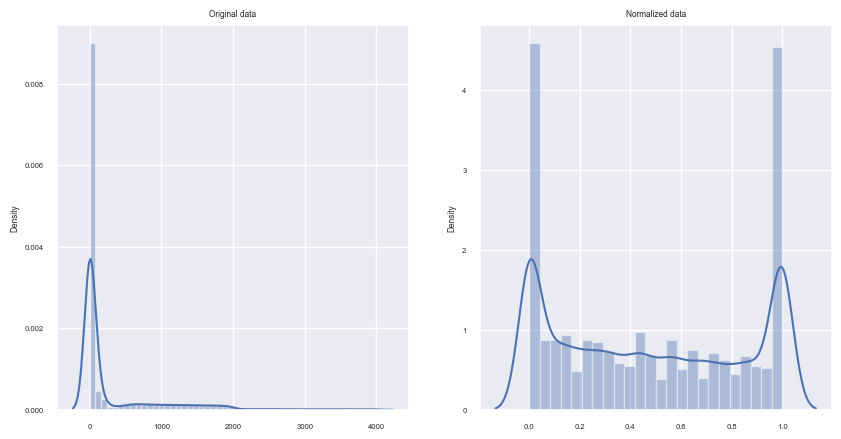

In [46]:
x_org=X.copy()
#Normalizing the independent variables
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
X=scale.fit_transform(X)

#Plotting the original data and the normalized data
fig,ax=plt.subplots(1,2,figsize=(10,5))
sns.distplot(x_org,ax=ax[0])
ax[0].set_title('Original data')
sns.distplot(X,ax=ax[1])
ax[1].set_title('Normalized data')
plt.show()

In [47]:
x_test=test_data_new.drop('id',axis=1)

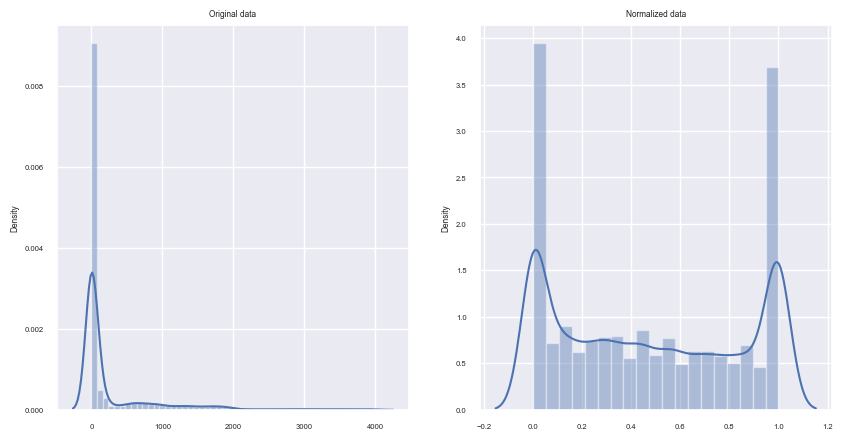

In [48]:
#Feature Scaling the test dataset

test_org=x_test.copy()
#Normalizing the independent variables
from sklearn.preprocessing import MinMaxScaler
scale_1=MinMaxScaler()
x_test_arr=scale_1.fit_transform(x_test)

#Plotting the original data and the normalized data
fig,ax=plt.subplots(1,2,figsize=(10,5))
sns.distplot(test_org,ax=ax[0])
ax[0].set_title('Original data')
sns.distplot(x_test_arr,ax=ax[1])
ax[1].set_title('Normalized data')
plt.show()

### TRAIN-VALIDATION SPLIT 

In [49]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3,random_state=42)

## MODEL CREATION 

### LOGISTIC REGRESSION 

In [50]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
model=clf.fit(x_train,y_train)

In [51]:
y_pred=model.predict(x_cv)
y_pred

array([3, 3, 3, 2, 1, 3, 0, 0, 1, 0, 0, 1, 0, 2, 0, 0, 3, 1, 3, 3, 0, 1,
       3, 1, 3, 3, 0, 1, 2, 0, 3, 2, 3, 3, 0, 3, 3, 3, 0, 1, 2, 2, 0, 0,
       1, 0, 1, 3, 1, 0, 0, 0, 3, 1, 1, 3, 3, 1, 3, 1, 3, 3, 3, 0, 2, 3,
       2, 0, 2, 3, 2, 0, 3, 0, 0, 1, 0, 1, 0, 1, 0, 3, 3, 0, 2, 3, 3, 1,
       1, 1, 0, 0, 2, 1, 1, 3, 2, 3, 3, 1, 3, 0, 3, 1, 1, 3, 1, 0, 1, 2,
       0, 2, 1, 3, 3, 3, 0, 0, 0, 2, 2, 1, 0, 0, 3, 3, 1, 0, 1, 2, 2, 1,
       1, 2, 3, 3, 1, 1, 3, 2, 1, 0, 3, 1, 0, 3, 2, 2, 1, 0, 1, 3, 2, 2,
       0, 2, 2, 1, 3, 3, 1, 1, 0, 3, 0, 3, 0, 1, 0, 3, 1, 0, 2, 1, 3, 3,
       0, 1, 3, 1, 0, 0, 0, 3, 1, 2, 2, 2, 0, 3, 0, 3, 1, 0, 2, 1, 0, 2,
       2, 2, 1, 1, 2, 3, 0, 3, 1, 3, 0, 2, 3, 0, 0, 2, 1, 3, 0, 0, 0, 1,
       1, 0, 2, 1, 2, 1, 3, 1, 3, 0, 3, 2, 1, 3, 1, 0, 1, 2, 3, 1, 1, 3,
       2, 0, 0, 0, 0, 3, 0, 2, 3, 0, 3, 0, 3, 3, 0, 1, 3, 3, 0, 0, 0, 3,
       0, 1, 0, 2, 1, 2, 3, 3, 2, 3, 2, 3, 2, 0, 0, 2, 3, 3, 0, 2, 1, 1,
       0, 0, 0, 3, 1, 3, 3, 3, 1, 1, 0, 1, 1, 1, 1,

In [52]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
print('Accuracy=',accuracy_score(y_cv,y_pred))
print('Precision=',precision_score(y_cv,y_pred,average='macro'))
print('Recall=',recall_score(y_cv,y_pred,average='macro'))
print('f1 score=',f1_score(y_cv,y_pred,average='macro'))

Accuracy= 0.9233333333333333
Precision= 0.9218839012398208
Recall= 0.9208768037616932
f1 score= 0.9210170442509519


In [53]:
print(confusion_matrix(y_cv,y_pred))

[[156   5   0   0]
 [ 14 140   7   0]
 [  0   8 107   7]
 [  0   0   5 151]]


In [54]:
y_test_pred=model.predict(x_test_arr)
y_test_pred

array([2, 3, 3, 2, 1, 3, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 3, 0, 2, 2, 0, 1,
       3, 1, 0, 1, 2, 3, 0, 2, 0, 0, 1, 0, 0, 2, 0, 1, 2, 1, 2, 2, 2, 1,
       0, 0, 0, 0, 2, 0, 2, 2, 2, 3, 0, 1, 2, 0, 3, 2, 2, 2, 0, 1, 2, 2,
       0, 0, 0, 2, 1, 0, 2, 0, 2, 0, 0, 1, 0, 2, 0, 0, 3, 3, 0, 0, 3, 2,
       2, 0, 2, 0, 3, 1, 1, 1, 2, 2, 0, 1, 3, 0, 3, 1, 2, 2, 2, 1, 2, 3,
       3, 2, 2, 1, 1, 2, 2, 2, 0, 0, 1, 0, 0, 0, 1, 0, 2, 3, 0, 1, 0, 2,
       1, 2, 0, 0, 2, 1, 0, 3, 0, 3, 3, 2, 2, 2, 0, 1, 1, 1, 2, 0, 0, 0,
       0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 3, 1,
       3, 3, 0, 0, 0, 1, 0, 2, 2, 0, 3, 1, 3, 0, 0, 1, 2, 3, 0, 1, 1, 0,
       1, 2, 3, 0, 2, 1, 0, 3, 0, 2, 2, 2, 1, 0, 1, 1, 2, 3, 2, 3, 0, 0,
       1, 0, 0, 3, 0, 2, 2, 1, 2, 0, 3, 0, 1, 0, 1, 3, 2, 0, 2, 3, 0, 2,
       2, 1, 2, 0, 1, 0, 3, 2, 3, 0, 0, 2, 0, 0, 1, 0, 0, 1, 0, 0, 3, 1,
       2, 0, 0, 3, 0, 0, 2, 1, 1, 0, 3, 3, 1, 2, 1, 3, 1, 3, 0, 0, 0, 2,
       0, 3, 1, 2, 3, 1, 2, 2, 2, 1, 2, 3, 3, 0, 2,

### KNN  

In [55]:
from sklearn.neighbors import KNeighborsClassifier
warnings.simplefilter('ignore')
metric_k=[]
neighbors=np.arange(3,15)

for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2)
    model_k=classifier.fit(x_train,y_train)
    y_pred_k=model_k.predict(x_cv)
    acc=accuracy_score(y_cv,y_pred_k)
    metric_k.append(acc)
metric_k    

[0.37833333333333335,
 0.4116666666666667,
 0.3983333333333333,
 0.40166666666666667,
 0.4083333333333333,
 0.43,
 0.43666666666666665,
 0.445,
 0.4216666666666667,
 0.42333333333333334,
 0.44333333333333336,
 0.4483333333333333]

Text(0, 0.5, 'accuracy')

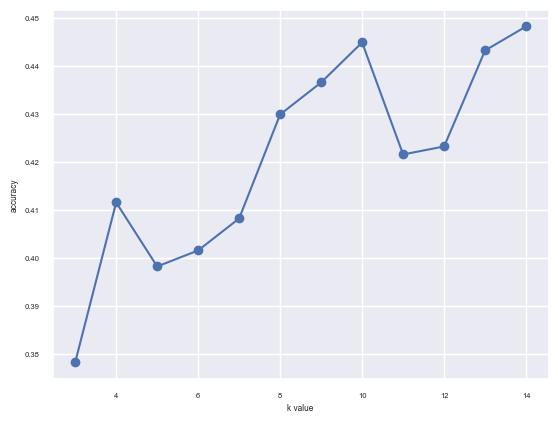

In [56]:
#Plot the metric_k values to get the value of k having maximum accuracy
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')

In [57]:
#The maximum accuracy value is at k=14
classifier=KNeighborsClassifier(n_neighbors=14,metric='minkowski',p=2)
model_k=classifier.fit(x_train,y_train)
y_pred_k=model_k.predict(x_cv)

In [58]:
#Evaluating the knn model for k=14
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
print('Accuracy=',accuracy_score(y_cv,y_pred_k))
print('Precision=',precision_score(y_cv,y_pred_k,average='macro'))
print('Recall=',recall_score(y_cv,y_pred_k,average='macro'))
print('f1 score=',f1_score(y_cv,y_pred_k,average='macro'))

Accuracy= 0.4483333333333333
Precision= 0.4653539901513851
Recall= 0.44362257485921064
f1 score= 0.44742663324767595


In [59]:
print(confusion_matrix(y_cv,y_pred_k))

[[100  40  20   1]
 [ 56  52  44   9]
 [ 12  40  45  25]
 [  4  22  58  72]]


In [60]:
y_test_pred=model_k.predict(x_test_arr)
y_test_pred

array([1, 1, 1, 0, 2, 3, 1, 1, 0, 0, 0, 2, 2, 1, 1, 0, 2, 0, 3, 3, 2, 0,
       2, 2, 0, 1, 2, 3, 0, 2, 0, 0, 1, 2, 0, 2, 0, 0, 3, 1, 2, 0, 2, 1,
       0, 0, 2, 0, 2, 0, 2, 2, 1, 2, 0, 1, 1, 0, 2, 1, 0, 0, 0, 0, 2, 2,
       0, 0, 0, 1, 2, 0, 1, 0, 2, 1, 0, 1, 1, 0, 1, 0, 3, 3, 0, 1, 2, 2,
       2, 0, 2, 0, 2, 1, 1, 1, 1, 3, 2, 2, 2, 0, 2, 0, 0, 1, 2, 0, 2, 3,
       2, 2, 0, 2, 0, 2, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 0, 1,
       2, 3, 1, 0, 1, 0, 2, 3, 1, 1, 2, 2, 2, 3, 1, 2, 0, 2, 2, 0, 2, 1,
       1, 1, 1, 2, 2, 1, 0, 0, 3, 1, 2, 0, 2, 2, 1, 1, 2, 0, 1, 0, 2, 1,
       2, 2, 1, 1, 0, 2, 0, 2, 1, 0, 2, 1, 2, 0, 1, 1, 3, 1, 0, 1, 1, 1,
       2, 2, 1, 0, 2, 0, 2, 3, 1, 2, 1, 2, 0, 0, 0, 1, 2, 1, 2, 2, 0, 1,
       0, 0, 0, 3, 0, 2, 1, 1, 2, 1, 3, 1, 1, 2, 0, 2, 1, 1, 2, 3, 0, 2,
       1, 1, 2, 0, 2, 0, 0, 2, 2, 0, 0, 1, 0, 0, 2, 1, 0, 1, 0, 2, 2, 1,
       0, 0, 1, 2, 1, 1, 1, 1, 2, 0, 2, 2, 0, 1, 0, 2, 0, 3, 0, 0, 0, 1,
       1, 2, 2, 1, 2, 0, 2, 1, 2, 0, 2, 2, 1, 0, 2,

### SVM 

In [61]:
from sklearn.svm import SVC
svmclf_linear=SVC(kernel='linear')
svmclf_linear.fit(x_train,y_train)

SVC(kernel='linear')

In [62]:
y_pred_svm=svmclf_linear.predict(x_cv)

#Evaluate the SVM-Linear model
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix
print('Accuracy=',accuracy_score(y_cv,y_pred_svm))
print('f1 score=',f1_score(y_cv,y_pred_svm,average='macro'))

Accuracy= 0.945
f1 score= 0.9439954243227535


In [63]:
print(confusion_matrix(y_cv,y_pred_svm))

[[155   6   0   0]
 [  9 149   3   0]
 [  0   2 114   6]
 [  0   0   7 149]]


In [64]:
svmclf_rbf=SVC(kernel='rbf')
svmclf_rbf.fit(x_train,y_train)
y_pred_svm=svmclf_rbf.predict(x_cv)

#Evaluate the SVM-rbf model
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix
print('Accuracy=',accuracy_score(y_cv,y_pred_svm))
print('f1 score=',f1_score(y_cv,y_pred_svm,average='macro'))
print(confusion_matrix(y_cv,y_pred_svm))

Accuracy= 0.84
f1 score= 0.8369936264322071
[[150  11   0   0]
 [ 15 123  23   0]
 [  0  15 102   5]
 [  0   0  27 129]]


In [65]:
svmclf_poly=SVC(kernel='poly')
svmclf_poly.fit(x_train,y_train)
y_pred_svm=svmclf_poly.predict(x_cv)

#Evaluate the SVM-rbf model
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix
print('Accuracy=',accuracy_score(y_cv,y_pred_svm))
print('f1 score=',f1_score(y_cv,y_pred_svm,average='macro'))
print(confusion_matrix(y_cv,y_pred_svm))

Accuracy= 0.8683333333333333
f1 score= 0.8639841026597955
[[151  10   0   0]
 [ 17 131  13   0]
 [  0  14  98  10]
 [  0   0  15 141]]


In [66]:
#The maximum accuracy is for SVM-linear model
y_test_pred=svmclf_linear.predict(x_test_arr)

In [67]:
y_test_pred

array([2, 3, 2, 2, 1, 3, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 3, 0, 2, 2, 0, 1,
       3, 1, 0, 1, 1, 3, 0, 2, 0, 1, 1, 0, 1, 2, 0, 1, 2, 1, 2, 2, 2, 1,
       1, 0, 0, 0, 2, 0, 2, 2, 2, 3, 0, 1, 2, 0, 3, 2, 2, 1, 0, 1, 2, 2,
       0, 1, 0, 2, 1, 0, 2, 0, 2, 0, 0, 1, 0, 2, 1, 0, 3, 3, 0, 0, 3, 2,
       3, 0, 2, 0, 3, 1, 1, 1, 2, 2, 0, 1, 3, 0, 3, 1, 2, 2, 2, 1, 3, 3,
       3, 2, 2, 1, 1, 2, 2, 2, 0, 0, 1, 0, 0, 0, 1, 0, 2, 3, 0, 1, 0, 2,
       1, 2, 0, 0, 2, 1, 0, 3, 0, 3, 3, 2, 2, 2, 0, 1, 1, 1, 2, 0, 0, 1,
       0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 3, 1,
       3, 3, 0, 1, 0, 1, 0, 2, 2, 0, 3, 1, 3, 0, 1, 1, 2, 3, 0, 1, 1, 0,
       1, 2, 3, 0, 2, 1, 0, 3, 0, 2, 2, 2, 1, 0, 1, 1, 2, 3, 2, 3, 0, 0,
       1, 0, 0, 3, 0, 2, 2, 1, 2, 0, 3, 0, 1, 1, 1, 3, 2, 0, 2, 3, 0, 2,
       2, 1, 2, 0, 1, 0, 3, 2, 3, 1, 0, 2, 0, 0, 1, 0, 0, 1, 0, 0, 3, 1,
       2, 0, 0, 3, 0, 0, 3, 1, 1, 0, 3, 3, 1, 2, 1, 3, 1, 3, 0, 0, 0, 2,
       0, 3, 1, 2, 3, 1, 2, 2, 1, 1, 2, 3, 3, 0, 2,